In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel(r'C:\Users\Albertjin\Desktop\前端\lw爬虫\数据\数据.xlsx')
data

,价格,网址,商品名称,裸机重量,厚度,屏幕尺寸,待机时长,屏幕色域,系统,处理器,内存,固态硬盘,显卡
0,8999,//item.jd.com/100010793473.html,联想拯救者R9000P,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,AMD R7,16GB,512GB,RTX3060
1,8999,//item.jd.com/100020923600.html,惠普16-b0007TX,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,Intel i7,16GB,512GB,RTX3060
2,9999,//item.jd.com/100019736906.html,联想拯救者R9000P,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,AMD R7,16GB,512GB,RTX3070
3,6799,//item.jd.com/100022003044.html,联想拯救者Y7000,none,20.0mm以上,15.0-15.9英寸,none,100%sRGB,Windows 10 带Office,Intel i5,16GB,512GB,RTX3050
4,4899,//item.jd.com/100021781178.html,none,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10099,//item.jd.com/100017970852.html,华硕灵耀X,1.5-2kg,15.1-18.0mm,14.0-14.9英寸,none,none,Windows 10 带Office,Intel i7,16GB,512GB,MX450
296,2799,//item.jd.com/100024169908.html,宏碁EX215-32-C7SA,1.5-2kg,15.1-18.0mm,15.0-15.9英寸,none,none,Windows 10 不带Office,none,8GB,256GB,none
297,3199,//item.jd.com/100019498800.html,京东京造JDBook,none,15.1-18.0mm,14.0-14.9英寸,none,none,Windows 10 不带Office,Intel i3,8GB,512GB,none
298,4999,//item.jd.com/100017751544.html,机械革命F1,1-1.5kg,15.0mm及以下,14.0-14.9英寸,none,none,Windows 10 不带Office,Intel i5,16GB,512GB,none


## 数据清洗

### 删除无商品名称的行

In [3]:
data1 = data
j = 0
for i in data['商品名称']:
    if i == 'none':
        data1 = data1.drop(labels=j, axis=0)
    j += 1

### 修改行索引(删除空行后索引不变，会导致索引有空缺)

In [4]:
data1 = data1.reset_index()
data1.drop('index', axis=1)

,价格,网址,商品名称,裸机重量,厚度,屏幕尺寸,待机时长,屏幕色域,系统,处理器,内存,固态硬盘,显卡
0,8999,//item.jd.com/100010793473.html,联想拯救者R9000P,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,AMD R7,16GB,512GB,RTX3060
1,8999,//item.jd.com/100020923600.html,惠普16-b0007TX,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,Intel i7,16GB,512GB,RTX3060
2,9999,//item.jd.com/100019736906.html,联想拯救者R9000P,none,20.0mm以上,16.0-16.9英寸,none,100%sRGB,Windows 10 带Office,AMD R7,16GB,512GB,RTX3070
3,6799,//item.jd.com/100022003044.html,联想拯救者Y7000,none,20.0mm以上,15.0-15.9英寸,none,100%sRGB,Windows 10 带Office,Intel i5,16GB,512GB,RTX3050
4,6399,//item.jd.com/100023344932.html,戴尔G15 5511,none,20.0mm以上,15.0-15.9英寸,none,none,Windows 10 带Office,Intel i5,16GB,512GB,RTX3050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,10099,//item.jd.com/100017970852.html,华硕灵耀X,1.5-2kg,15.1-18.0mm,14.0-14.9英寸,none,none,Windows 10 带Office,Intel i7,16GB,512GB,MX450
258,2799,//item.jd.com/100024169908.html,宏碁EX215-32-C7SA,1.5-2kg,15.1-18.0mm,15.0-15.9英寸,none,none,Windows 10 不带Office,none,8GB,256GB,none
259,3199,//item.jd.com/100019498800.html,京东京造JDBook,none,15.1-18.0mm,14.0-14.9英寸,none,none,Windows 10 不带Office,Intel i3,8GB,512GB,none
260,4999,//item.jd.com/100017751544.html,机械革命F1,1-1.5kg,15.0mm及以下,14.0-14.9英寸,none,none,Windows 10 不带Office,Intel i5,16GB,512GB,none


### 删除空缺值较多的行

In [5]:
data1.replace(np.nan, 'none')
data1 = data.dropna(thresh=4)

### 此外还根据建模的需求，通过Excel对屏幕色域、内存等硬件的表现进行赋分，此处详见数据建模部分

## 数据预处理
- python：品牌分类
- Excel：价格分类

### 品牌分类

In [6]:
j = 0
data1['品牌'] =  None
for i in data1['商品名称']:
    if 'Think' in i:
        data1['品牌'][j] = '联想'
    elif '机械' in i:
        data1['品牌'][j] = '机械革命'
    elif 'Mac' in i:
        data1['品牌'][j] = '苹果'
    elif '外星人' in i:
        data1['品牌'][j] = '戴尔'
    elif 'RO' in i:
        data1['品牌'][j] = '华硕'
    else :
        data1['品牌'][j] = i[0:2]
    j += 1
        

<ipython-input-6-17ca467f0441>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['品牌'][j] = i[0:2]
<ipython-input-6-17ca467f0441>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['品牌'][j] = '华硕'
<ipython-input-6-17ca467f0441>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['品牌'][j] = '联想'
<ipython-input-6-17ca467f0441>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

### 价格分类(Excel处理)
- Excel所需的语法基础更简单，但代价是更加复杂的代码形式以及较弱的数据处理灵活性。
#### 源代码：
>=IF(C3<3500,"小于3500",IF(C3<5000,"3500-5000",IF(C3<6500,"5000-6500",IF(C3<8000,"6500-8000",IF(C3<10000,"8000-10000",IF(C3<12000,"10000-12000",IF(C3<15000,"12000-15000",IF(C3<20000,"15000-20000",大于20000))))))))


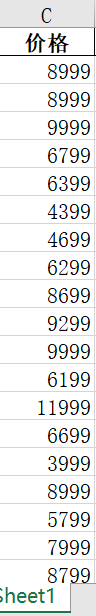

### DataFrame数据转化为Excel数据

In [7]:
data1.to_excel(r'C:\Users\Albertjin\Desktop\数据处理_python.xlsx')

## 数据分析

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#设置字体为楷体，否则中文字体会在图像中显示为乱码
plt.rcParams['font.sans-serif'] = ['KaiTi']
sns.set_style({'font.sans-serif' : ['KaiTi']})

### 巧用pandas强大的函数库，否则得用循环来统计个数，效率较低
### value_counts()适合单行数据统计
### groupby()适合多行数据统计，统计方法更加灵活

In [9]:
data1 = pd.read_excel(r'C:\Users\Albertjin\Desktop\数据处理.xlsx')
a = data1['品牌'].value_counts()
c = data1.groupby(['品牌']).count()
d = c['index'].sort_values(ascending=False)

#### 对比value_counts()和groupby()函数

In [10]:
print(f'value_counts()函数')
print(f'{a}\n\n')
print(f'groupby()函数')
print(c)

value_counts()函数
联想      69
华硕      43
戴尔      32
惠普      18
华为      17
苹果      16
小米      13
机械革命    12
神舟      10
宏碁       9
荣耀       8
雷神       7
微星       3
京东       2
真我       1
攀升       1
雷蛇       1
Name: 品牌, dtype: int64


groupby()函数
      Unnamed: 0  Unnamed: 0.1  index  价格  网址  商品名称  裸机重量  厚度  屏幕尺寸  待机时长  \
品牌                                                                          
京东             2             2      2   2   2     2     2   2     2     2   
华为            17            17     17  17  17    17    17  17    17    17   
华硕            43            43     43  43  43    43    43  43    43    43   
宏碁             9             9      9   9   9     9     9   9     9     9   
小米            13            13     13  13  13    13    13  13    13    13   
微星             3             3      3   3   3     3     3   3     3     3   
惠普            18            18     18  18  18    18    18  18    18    18   
戴尔            32            32     32  32  32    32    32  32    3

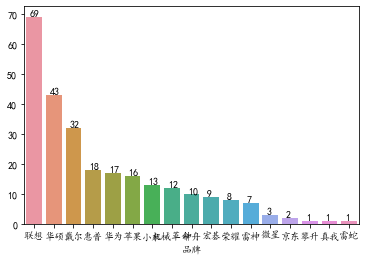

In [11]:
p1 = sns.barplot(x=d.index, y=d.values)
# 柱状图上显示各个类别的数量
j = 0
for i in d:
    p1.text(j-0.2, i+0.2, i)
    j += 1

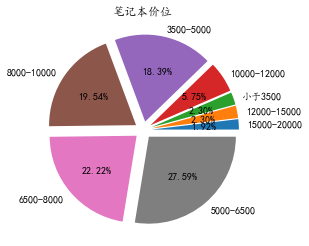

In [12]:
a = data1.groupby(['价位']).count()
b = a['index'].sort_values()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(b, explode=explode, labels = b.index, autopct='%1.2f%%')
plt.title('笔记本价位')
plt.show()

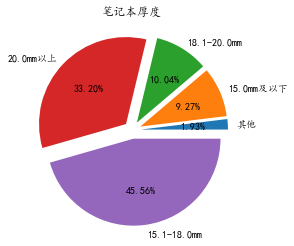

In [13]:
a = data1.groupby(['厚度']).count()
a.drop(['none'],axis=0, inplace=True)
b = a['index'].sort_values()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(b, explode=explode, labels = b.index, autopct='%1.2f%%')
plt.title('笔记本厚度')
plt.show()

<AxesSubplot:xlabel='厚度', ylabel='价格'>

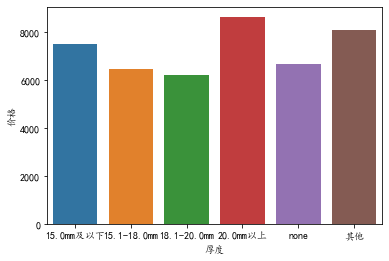

In [86]:
a = data1.groupby(['厚度'])['价格'].mean()
sns.barplot(x=a.index, y=a)


### 初步结论：
#### 品牌：联想占据线上市场的龙头，华硕、戴尔也有较大的市场份额，惠普、华为、苹果等品牌也有一定的市场占有率。
#### 5000-8000为价格主流，3500-5000以及8000-10000也有一定份额。
#### 笔记本厚度方面，15.1-18.0mm占据主流。但是在轻薄为主流的笔记本市场中，20.0mm的高端价位的笔记本的市场份额依旧不小。

### 词云图：数据量比较大且杂的时候应用
#### 由于数据量的问题，只爬取了一件商品的前250条评论而非全部评论
#### 以https://item.jd.com/100015691164.html 惠普（HP）战66 四代为例
#### 爬虫源代码参考：https://mp.weixin.qq.com/s?__biz=MzU3MzQxMjE2NA==&mid=2247497142&idx=1&sn=2317d8b28822b9df6da8527db8627987&chksm=fcc0b39dcbb73a8b9fcf4d04678b7c4eed3092183c9550593be754f51ed4815b5272e7cf249d&mpshare=1&scene=23&srcid=1010rLw3HxASK3I37y97MREC&sharer_sharetime=1633830832101&sharer_shareid=b6bc3cc0c141ac0d89a62581a89908d0#rd

In [ ]:
import  requests
import  json
import  time
import  openpyxl  #第三方模块，用于操作Excel文件的
#模拟浏览器发送请求并获取响应结果
import random


def get_comments(productId,page):
    url='https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId={0}&score=0&sortType=5&page={1}&pageSize=10&isShadowSku=0&fold=1'.format(productId,page) # 商品id
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
    }

    resp=requests.get(url,headers=headers)
    #print(resp.text)  #响应结果进行显示输出
    s1=resp.text.replace('fetchJSON_comment98(','') #fetchJSON_comment98(
    s=s1.replace(');','')
    #将str类型的数据转成json格式的数据
    # print(s,type(s))
    # print('*'*100)
    res=json.loads(s)
    print(type(res))
    return res



    lst=[]  #用于存储提取到的商品数据
    for page in range(0,25): 
        comments=get_comments(productId,page)
        comm_lst=comments['comments']   #根据key获取value，根据comments获取到评论的列表（每页有10条评论）
        #遍历评论列表，分别获取每条评论的中的内容，颜色，鞋码
        for item in comm_lst:   #每条评论又分别是一个字典，再继续根据key获取值
            content=item['content']  #获取评论中的内容
            color=item['productColor'] #获取评论中的颜色
            size=item['productSize'] #鞋码
            lst.append([content,color,size])  #将每条评论的信息添加到列表中
        time.sleep(3)  #延迟时间，防止程序执行速度太快，被封IP
    save(lst)  #调用自己编写的函数，将列表中的数据进行存储
    

def save(lst):
    wk=openpyxl.Workbook () #创建工作薄对象
    sheet=wk.active  #获取活动表
    #遍历列表，将列表中的数据添加到工作表中,列表中的一条数据，在Excel中是 一行
    for item in lst:
        sheet.append(item)
    #保存到磁盘上
    wk.save('电脑销售数据.xlsx')
    

if __name__ == '__main__':
    productId='100015691164' # 单品id
    get_info(productId)

#### 运用了简单的自然语言处理

[('屏幕', 0.16388467304606671), ('轻薄', 0.14301771711416067), ('非常', 0.13726878307998927), ('外观', 0.1222255230154285), ('速度', 0.11522379532542637), ('电脑', 0.11464037256321785), ('散热', 0.10903468490917409), ('开机', 0.10161973822084092), ('惠普', 0.10102055910475169), ('运行', 0.08920056314071866), ('外形', 0.06873900999392685), ('效果', 0.0660252147495731), ('不错', 0.06305719325126032), ('笔记本', 0.060444276228982095), ('键盘', 0.059217178912731955), ('办公', 0.054811373776647), ('清晰', 0.054358332713036576), ('15.6', 0.051291504892845646), ('高色域', 0.05000921727052451), ('很快', 0.04931397890065537)]


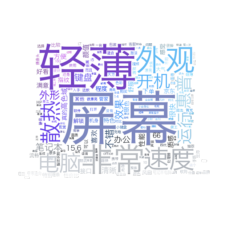

In [14]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba.analyse

# 打开文本
text = open('data.txt', encoding='UTF-8').read()

# 提取关键词和权重
freq = jieba.analyse.extract_tags(text, topK=200, withWeight=True)
print(freq[:20])
freq = {i[0]: i[1] for i in freq}

# 生成对象
mask = np.array(Image.open("color_mask.jpeg"))
wc = WordCloud(mask=mask, font_path='Hiragino.ttf', mode='RGBA', background_color=None).generate_from_frequencies(freq)

# 从图片中生成颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 保存到文件
wc.to_file('wordcloud.png')
